**SCALER - Clustering Business Case**



**Dataset Summary:**

The dataset `scaler_kmeans.csv` contains anonymized learner information, including:

- Unnamed: 0 - Index of the dataset.
- Email_hash - An anonymized identifier representing the learner's email.
- Company_hash - An anonymized identifier for the learner’s current employer.
- orgyear - The year the learner began working at their current company.
- CTC - The learner’s current Cost to Company (CTC).
- Job_position - The job profile or designation of the learner.
- CTC_updated_year - The year when the learner’s CTC was most recently updated (due to promotions, appraisals, etc.).

---

**Objective:**

The goal of this case study is to use unsupervised learning techniques.

- Segment learners into distinct groups based on their professional profiles.
- Identify hidden patterns in learner backgrounds such as company experience, compensation, and roles.
- Help Scaler deliver personalized learning paths, mentorship, and content based on cluster insights.
- Provide learners with real-world exposure to clustering, EDA, and data preprocessing techniques in a business context.

This exercise contributes to better learner profiling, improved retention, and enhanced learner satisfaction for Scaler as a tech-versity.


In [ ]:
# Importing the dataset

!wget "https://drive.google.com/uc?export=download&id=1B6kjpN8PEG7xZpnmjrW7bmJ0SLabc3d9" -O dataset.csv

--2025-05-07 13:58:12--  https://drive.google.com/uc?export=download&id=1B6kjpN8PEG7xZpnmjrW7bmJ0SLabc3d9
Resolving drive.google.com (drive.google.com)... 74.125.141.139, 74.125.141.138, 74.125.141.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1B6kjpN8PEG7xZpnmjrW7bmJ0SLabc3d9&export=download [following]
--2025-05-07 13:58:12--  https://drive.usercontent.google.com/download?id=1B6kjpN8PEG7xZpnmjrW7bmJ0SLabc3d9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24735965 (24M) [application/octet-stream]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  23.59M  91.4MB/s   

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset

df=pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


# **EDA and Data Preprocessing:**

In [ ]:
# Dropping the unnecessary column - Unnamed

df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
# Number of rows and columns in dataset

print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 205843, Columns: 6


In [ ]:
# Summary of DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
df_original=df.copy()

In [ ]:
# Changing the datatypes to optimize performance, reduce memory usage, and improve data integrity

df["orgyear"] = df["orgyear"].astype("Int64")
df["ctc_updated_year"] = df["ctc_updated_year"].astype("Int64")
df["job_position"] = df["job_position"].astype("category")

In [ ]:
# Checking the duplicate entries

df.duplicated().sum()

np.int64(34)

In [ ]:
# Removing the duplicate entries

df=df.drop_duplicates()

In [ ]:
# Number of unique vaules in each column

print(df.nunique())

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64


In [ ]:
df['email_hash'].value_counts()

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,8
...,...
f4415be48a1ef885e086dcd72181f667a289641e66f828159d7154228a9b9a95,1
871201225ef08d05e84e4e04723d5ade66d9fd40e5566785eaa9da48ebaf56ac,1
6d6c2a8824718de73d60e772622ebf3e67a522dbf8fc76d615b6bb8ab497f77b,1


"We observe that there are multiple entries corresponding to the same user (based on email_hash). This could be due to changes in job position, updates to CTC, or other organizational updates over time. For the purpose of clustering, it is essential to maintain only the most recent and relevant record per user. Therefore, we retain only the latest entry based on the ctc_updated_year, ensuring that our analysis reflects the most up-to-date profile of each user."

In [ ]:
# Sort by email_hash and ctc_updated_year in descending order
df_sorted = df.sort_values(by=['email_hash', 'ctc_updated_year'], ascending=[True, False])

# Drop duplicates, keeping only the latest entry for each email_hash
df = df_sorted.drop_duplicates(subset='email_hash', keep='first').reset_index(drop=True)

In [ ]:
df.shape

(153443, 6)

In [ ]:
# Summary orgyear column

df['orgyear'].describe()

,orgyear
count,153360.0
mean,2014.52305
std,73.25472
min,0.0
25%,2013.0
50%,2016.0
75%,2018.0
max,20165.0


The orgyear column contains several invalid entries, such as years recorded as 0 or extremely large values like 20165, which are not realistic representations of employment start years. These anomalies are likely due to data entry errors. Therefore, we will replace these invalid values with NaN to handle them appropriately during further analysis.

In [ ]:
# Define the range of valid years (e.g., 1990 to 2021)

valid_years = range(1990, 2021)
df['orgyear'] = df['orgyear'].apply(lambda x: x if x in valid_years else np.nan)

In [ ]:
df.shape

(153443, 6)

In [ ]:
df['ctc'].describe()

,ctc
count,1.534430e+05
mean,2.518090e+06
std,1.309075e+07
min,2.000000e+00
25%,5.500000e+05
50%,9.800000e+05
75%,1.700000e+06
max,1.000150e+09


<Axes: ylabel='ctc'>

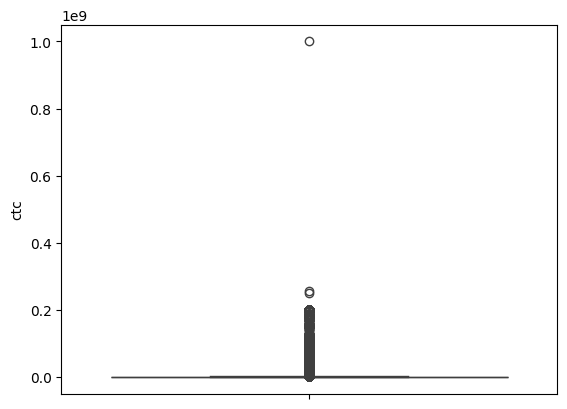

In [ ]:
sns.boxplot(df['ctc'])

The ctc column contains extreme and unrealistic values, ranging from as low as ₹2 to over ₹100 crores. To maintain the reliability of our analysis and minimize the impact of such outliers, we clip the CTC values within a reasonable range based on percentile thresholds.

In [ ]:
lower = df['ctc'].quantile(0.01)
upper = df['ctc'].quantile(0.99)

df['ctc'] = df['ctc'].clip(lower=lower, upper=upper)

In [ ]:
# Percentage of null values in each column

null_count = df.isnull().sum()

null_percentage = (df.isnull().mean() * 100).round(2)

null_summary = pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage (%)': null_percentage
})

print(null_summary)


                  Null Count  Null Percentage (%)
company_hash              37                 0.02
email_hash                 0                 0.00
orgyear                 4086                 2.66
ctc                        0                 0.00
job_position           33767                22.01
ctc_updated_year           0                 0.00


In [ ]:
# Summary statistics for categorical columns

df.describe(include=['object','category'])

,company_hash,email_hash,job_position
count,153406,153443,119676
unique,36338,153443,738
top,nvnv wgzohrnvzwj otqcxwto,ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4...,Backend Engineer
freq,5241,1,33286


In [ ]:
df['job_position'] = df['job_position'].cat.add_categories('Unknown')
df['job_position'] = df['job_position'].fillna('Unknown')



In [ ]:
df['company_hash'] = df['company_hash'].fillna('Unknown')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

df_numeric = df[['orgyear', 'ctc', 'ctc_updated_year']]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

imputer = KNNImputer(n_neighbors=5)
df_imputed_scaled = imputer.fit_transform(df_scaled)

df_imputed_original = scaler.inverse_transform(df_imputed_scaled)

df_imputed_df = pd.DataFrame(df_imputed_original, columns=df_numeric.columns)

df_imputed_df['orgyear'] = df_imputed_df['orgyear'].round()

df_imputed_df.head()


,orgyear,ctc,ctc_updated_year
0,2012.0,3500000.0,2019.0
1,2013.0,250000.0,2020.0
2,2014.0,1300000.0,2019.0
3,2004.0,2000000.0,2021.0
4,2009.0,3400000.0,2018.0


In [ ]:
df['orgyear'] = df_imputed_df['orgyear']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   company_hash      153443 non-null  object  
 1   email_hash        153443 non-null  object  
 2   orgyear           153443 non-null  float64 
 3   ctc               153443 non-null  int64   
 4   job_position      153443 non-null  category
 5   ctc_updated_year  153443 non-null  Int64   
dtypes: Int64(1), category(1), float64(1), int64(1), object(2)
memory usage: 6.3+ MB


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018


In [ ]:
from collections import Counter
import re


# Combine all job titles into one string, lowercased
all_text = ' '.join(df['job_position'].dropna().str.lower())

# Remove punctuation/special characters and split into words
words = re.findall(r'\b\w+\b', all_text)

# Count frequency of each word
word_counts = Counter(words)

# Convert to a DataFrame and display top N words
most_common_words = pd.DataFrame(word_counts.most_common(40), columns=['Word', 'Count'])
print(most_common_words)


             Word  Count
0        engineer  80063
1         backend  34306
2         unknown  33767
3       fullstack  18342
4           other  13802
5        frontend   8345
6     engineering   7798
7            data   6903
8      leadership   6063
9              qa   5702
10      scientist   4653
11        android   4622
12           sdet   4350
13         devops   4108
14        support   2639
15            ios   2480
16        analyst   2303
17        product   2223
18         intern   1877
19        manager   1742
20       designer   1233
21      architect    990
22       research    871
23      engineers    844
24        program    728
25  administrator    476
26       database    466
27          coder    405
28            non    404
29       software    339
30             co    312
31        founder    310
32         senior    161
33       security    129
34      developer    111
35        release    106
36      associate     95
37    development     63
38              2     63


In [ ]:
def categorize_role(text):
    text = str(text).lower()
    if any(word in text for word in ['engineer', 'engineering', 'developers', 'developer', 'software', 'sde', 'coder']):
        return 'Software Engineering'
    elif 'backend' in text:
        return 'Backend Developer'
    elif 'frontend' in text:
        return 'Frontend Developer'
    elif 'fullstack' in text:
        return 'Fullstack Developer'
    elif any(word in text for word in ['data', 'scientist', 'analyst', 'research']):
        return 'Data & Analytics'
    elif any(word in text for word in ['android', 'ios']):
        return 'Mobile Developer'
    elif any(word in text for word in ['qa', 'sdet']):
        return 'QA & Testing'
    elif any(word in text for word in ['devops', 'release', 'support', 'administrator', 'database']):
        return 'DevOps / Infra'
    elif any(word in text for word in ['product', 'manager', 'program', 'associate']):
        return 'Product Management'
    elif 'designer' in text:
        return 'Design & UX'
    elif 'security' in text:
        return 'Security'
    elif any(word in text for word in ['leadership', 'founder', 'architect', 'senior']):
        return 'Leadership'
    elif any(word in text for word in ['unknown', 'other', 'non', 'intern', 'co', '2']):
        return 'Other / Unknown'
    else:
        return 'Uncategorized'

df['role_category'] = df['job_position'].apply(categorize_role)


In [ ]:
df['role_category'].value_counts()


,count
role_category,
Software Engineering,93654
Other / Unknown,47637
Data & Analytics,7429
Product Management,3012
Backend Developer,981
Leadership,330
Uncategorized,255
Security,125
DevOps / Infra,14


<ipython-input-32-eb1d253eb6d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='role_category', order=df['role_category'].value_counts().index, palette='viridis')


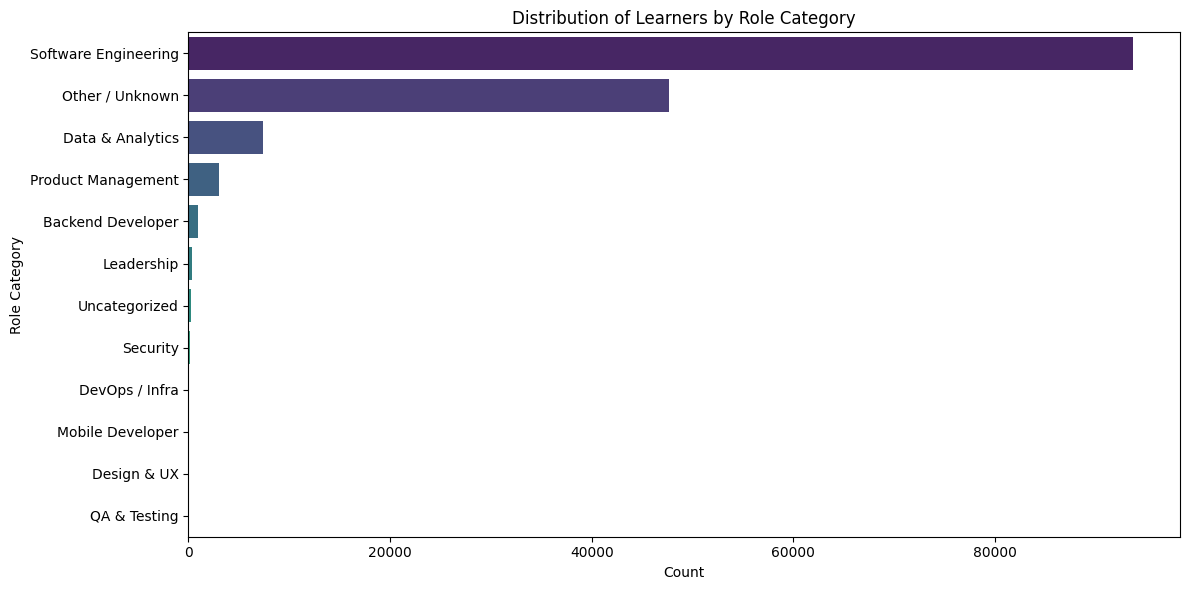

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='role_category', order=df['role_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Learners by Role Category')
plt.xlabel('Count')
plt.ylabel('Role Category')
plt.tight_layout()
plt.show()


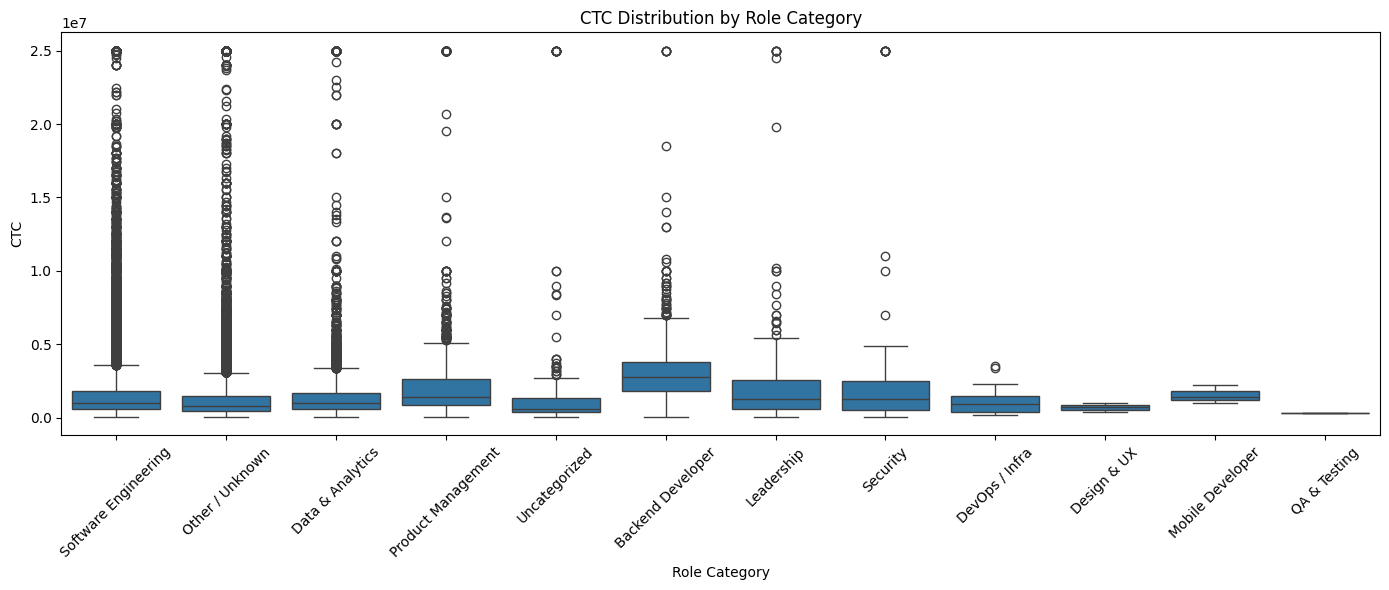

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='role_category', y='ctc')
plt.xticks(rotation=45)
plt.title('CTC Distribution by Role Category')
plt.ylabel('CTC')
plt.xlabel('Role Category')
plt.tight_layout()
plt.show()


In [ ]:
role_summary = df.groupby('role_category')['ctc'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='mean', ascending=False)
print(role_summary)


                      count          mean     median     min       max
role_category                                                         
Backend Developer       981  3.125172e+06  2800000.0   40000  25000000
Security                125  3.043880e+06  1300000.0   40000  25000000
Leadership              330  2.284527e+06  1295000.0   40000  25000000
Uncategorized           255  2.225656e+06   600000.0   40000  25000000
Product Management     3012  2.205336e+06  1400000.0   40000  25000000
Data & Analytics       7429  1.661870e+06  1000000.0   40000  25000000
Software Engineering  93654  1.577632e+06  1000000.0   40000  25000000
Other / Unknown       47637  1.534361e+06   800000.0   40000  25000000
Mobile Developer          3  1.532333e+06  1420000.0  977000   2200000
DevOps / Infra           14  1.225000e+06   915000.0  180000   3500000
Design & UX               2  6.949995e+05   694999.5  370000   1019999
QA & Testing              1  3.000000e+05   300000.0  300000    300000


EDA Insights: Role Categories vs CTC

1. **Highest Paying Roles (Average CTC):**
- **Backend Developer**: ₹31.25L  
- **Security**: ₹30.44L  
- **Leadership**: ₹22.84L  
These roles have fewer learners but show high compensation, indicating niche skills or senior-level experience.

2. **Most Common Roles:**
- **Software Engineering**: 93,654 learners  
- **Other / Unknown**: 47,637 learners  
- **Data & Analytics**: 7,429 learners  
Scaler's main user base is software engineers. A large portion of users fall into ambiguous or unclassified roles.

3. **Data & Analytics Segment:**
- **Average CTC**: ₹16.6L  
- **Median CTC**: ₹10L  
This is a high-potential segment. Offering specialized programs in machine learning, data engineering, etc., can improve learner outcomes.

4. **Product Management:**
- **Learners**: 3,012  
- **Median CTC**: ₹14L  
A strong segment with solid compensation. Scaler can provide leadership and strategic thinking modules to enhance their career growth.

5. **Edge Role Categories:**
- **Mobile Developer**: Only 3 learners, Avg CTC ₹15.3L  
- **Design & UX**: Only 2 learners, Avg CTC ₹6.9L  
- **QA & Testing**: Only 1 learner  
These roles have too few data points for strong conclusions, but could benefit from focused content if the numbers grow.

6. **Recommendations:**
- **Focus content** and mentorship programs around key roles like **Software Engineering**, **Backend Development**, and **Data & Analytics**.  



In [ ]:
# Feature Engineering

df['Yoe'] = 2021 - df['orgyear']



In [ ]:


# Get the current year
current_year = 2021

# Create a flag based on whether the 'CTC_updated_year' is the current year
df['Increment_or_Promotion'] = df['ctc_updated_year'].apply(lambda x: 1 if x == current_year else 0)

# Show the updated DataFrame
df.head()


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0


In [ ]:
import pandas as pd

# Define the bin edges for categorizing the 'CTC' values
ctc_bins = [0, 1000000, 5000000, float('inf')]  # Adjust the values as per your needs
ctc_labels = ['Low', 'Average', 'High']  # Labels for the bins

# Create a new column with categorized 'CTC' values
df['ctc_category'] = pd.cut(df['ctc'], bins=ctc_bins, labels=ctc_labels, right=False)

# Show the updated DataFrame
df


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0,Average
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0,Low
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0,Average
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1,Average
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0,Average
...,...,...,...,...,...,...,...,...,...,...
153438,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,2004.0,3529999,QA Engineer,2019,Software Engineering,17.0,0,Average
153439,trnqvcg,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,2015.0,1600000,Unknown,2018,Other / Unknown,6.0,0,Average
153440,znn avnv srgmvr atrxctqj otqcxwto,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,2014.0,900000,Devops Engineer,2019,Software Engineering,7.0,0,Low
153441,zwq wgqugqvnxgz,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,2020.0,700000,FullStack Engineer,2020,Software Engineering,1.0,0,Low


In [ ]:
# Count the number of learners in each CTC category
ctc_category_counts = df['ctc_category'].value_counts()

# Display the counts
print(ctc_category_counts)


ctc_category
Low        77003
Average    71365
High        5075
Name: count, dtype: int64


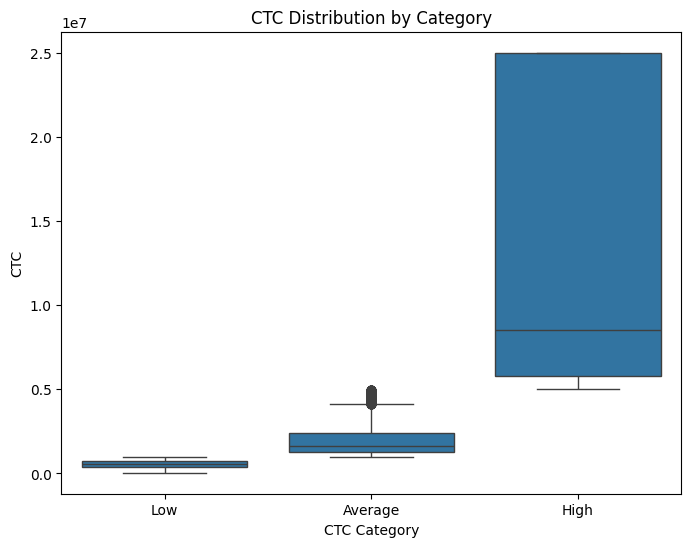

In [ ]:
# Boxplot for 'CTC' categorized by 'CTC_category'
plt.figure(figsize=(8, 6))
sns.boxplot(x='ctc_category', y='ctc', data=df)
plt.title('CTC Distribution by Category')
plt.xlabel('CTC Category')
plt.ylabel('CTC')
plt.show()


In [ ]:
# Group by 'CTC_category' and calculate summary statistics for 'CTC'
ctc_category_summary = df.groupby('ctc_category')['ctc'].describe()
ctc_category_summary.T


<ipython-input-40-4e9a06aa924a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ctc_category_summary = df.groupby('ctc_category')['ctc'].describe()


ctc_category,Low,Average,High
count,77003.000000,7.136500e+04,5.075000e+03
mean,539861.058154,1.920426e+06,1.300522e+07
std,243549.680431,8.591154e+05,8.440764e+06
min,40000.000000,1.000000e+06,5.000000e+06
25%,380000.000000,1.250000e+06,5.815000e+06
50%,550000.000000,1.650000e+06,8.500000e+06
75%,730000.000000,2.400000e+06,2.500000e+07
max,999999.000000,4.980000e+06,2.500000e+07


1. Low CTC (₹40K - ₹10L):
   - Largest group of learners (77,003).
   - Average salary: ₹539,861.
   - Focus on entry-level training to help move to mid-level roles.

2. Average CTC (₹10L - ₹50L):
   - Mid-level roles, 71,365 learners.
   - Average salary: ₹1,920,426.
   - Specialization and leadership training could help advance careers.

3. High CTC (₹50L - ₹2.5Cr):
   - Senior/executive roles, 5,075 learners.
   - Average salary: ₹13,005,221.
   - Executive-level courses could help with further career growth.

Key Takeaways:
- Low CTC: Focus on foundational skills.
- Average CTC: Target specialization and leadership growth.
- High CTC: Offer advanced leadership and executive training.


In [ ]:
# Step 1: Get average CTC per company
company_avg_ctc = df.groupby('company_hash')['ctc'].mean().reset_index()
company_avg_ctc.columns = ['company_hash', 'avg_ctc']

# Step 2: Define tiering function
def industry_ctc_tier(ctc):
    if ctc < 600000:
        return 3
    elif ctc < 1500000:
        return 2
    elif ctc < 3000000:
        return 1
    else:
        return 0

# Step 3: Apply tiering
company_avg_ctc['company_tier'] = company_avg_ctc['avg_ctc'].apply(industry_ctc_tier)
df = df.merge(company_avg_ctc[['company_hash', 'company_tier']], on='company_hash', how='left')

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category,company_tier
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0,Average,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0,Low,3
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0,Average,2
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1,Average,1
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0,Average,1


In [ ]:
#Companies Summary based on Tier

cts=df.groupby('company_tier')['ctc'].describe()
cts

,count,mean,std,min,25%,50%,75%,max
company_tier,,,,,,,,
0,6063.0,6.306989e+06,7.631143e+06,40000.0,1800000.0,3479999.0,6000000.0,25000000.0
1,57258.0,2.103255e+06,2.561452e+06,40000.0,1000000.0,1610000.0,2500000.0,25000000.0
2,75826.0,1.069910e+06,1.817851e+06,40000.0,550000.0,800000.0,1200000.0,25000000.0
3,14296.0,3.377955e+05,2.048154e+05,40000.0,180000.0,350000.0,480000.0,2800000.0


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category,company_tier
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0,Average,1
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0,Low,3
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0,Average,2
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1,Average,1
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0,Average,1


In [ ]:
avg_ctc_by_position_yoe = df.groupby(['job_position', 'Yoe'])['ctc'].mean().reset_index()
avg_ctc_by_position_yoe.columns = ['job_position', 'Yoe', 'avg_ctc']

def assign_flag(avg_ctc):
    if avg_ctc < 600000:
        return 1  # Junior
    elif avg_ctc < 1500000:
        return 2  # Mid-level
    else:
        return 3  # Senior

avg_ctc_by_position_yoe['designation_flag'] = avg_ctc_by_position_yoe['avg_ctc'].apply(assign_flag)
avg_ctc_by_position_yoe

<ipython-input-45-2d705e231154>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ctc_by_position_yoe = df.groupby(['job_position', 'Yoe'])['ctc'].mean().reset_index()


,job_position,Yoe,avg_ctc,designation_flag
0,SDE 2,1.0,NaN,3
1,SDE 2,2.0,NaN,3
2,SDE 2,3.0,NaN,3
3,SDE 2,4.0,NaN,3
4,SDE 2,5.0,NaN,3
...,...,...,...,...
31522,Unknown,27.0,5.324571e+06,3
31523,Unknown,28.0,1.051429e+06,2
31524,Unknown,29.0,1.642857e+06,3
31525,Unknown,30.0,3.911600e+06,3


In [ ]:
df = df.merge(avg_ctc_by_position_yoe[['job_position', 'Yoe', 'designation_flag']],on=['job_position', 'Yoe'],how='left')


In [ ]:
#Designation Summary

designation_summary=df.groupby('designation_flag')['ctc'].describe()
designation_summary

,count,mean,std,min,25%,50%,75%,max
designation_flag,,,,,,,,
1,551.0,3.565278e+05,2.225809e+05,40000.0,200000.0,360000.0,450000.0,2000000.0
2,82441.0,1.206259e+06,2.282192e+06,40000.0,490000.0,760000.0,1250000.0,25000000.0
3,70451.0,2.057912e+06,3.185650e+06,40000.0,740000.0,1360000.0,2300000.0,25000000.0


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category,company_tier,designation_flag
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0,Average,1,3
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0,Low,3,3
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0,Average,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1,Average,1,3
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0,Average,1,3


In [ ]:
df['company_tier'].value_counts()

,count
company_tier,
2,75826
1,57258
3,14296
0,6063


In [ ]:
df['designation_flag'].value_counts()

,count
designation_flag,
2,82441
3,70451
1,551


In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,Yoe,Increment_or_Promotion,company_tier,designation_flag
count,153443.000000,1.534430e+05,153443.0,153443.000000,153443.000000,153443.000000,153443.000000
mean,2014.679001,1.594231e+06,2019.492613,6.320999,0.274773,1.640987,2.455544
std,4.214294,2.764602e+06,1.371847,4.214294,0.446401,0.703909,0.505180
min,1990.000000,4.000000e+04,2015.0,1.000000,0.000000,0.000000,1.000000
25%,2013.000000,5.500000e+05,2019.0,3.000000,0.000000,1.000000,2.000000
50%,2016.000000,9.800000e+05,2020.0,5.000000,0.000000,2.000000,2.000000
75%,2018.000000,1.700000e+06,2021.0,8.000000,1.000000,2.000000,3.000000
max,2020.000000,2.500000e+07,2021.0,31.000000,1.000000,3.000000,3.000000


[]

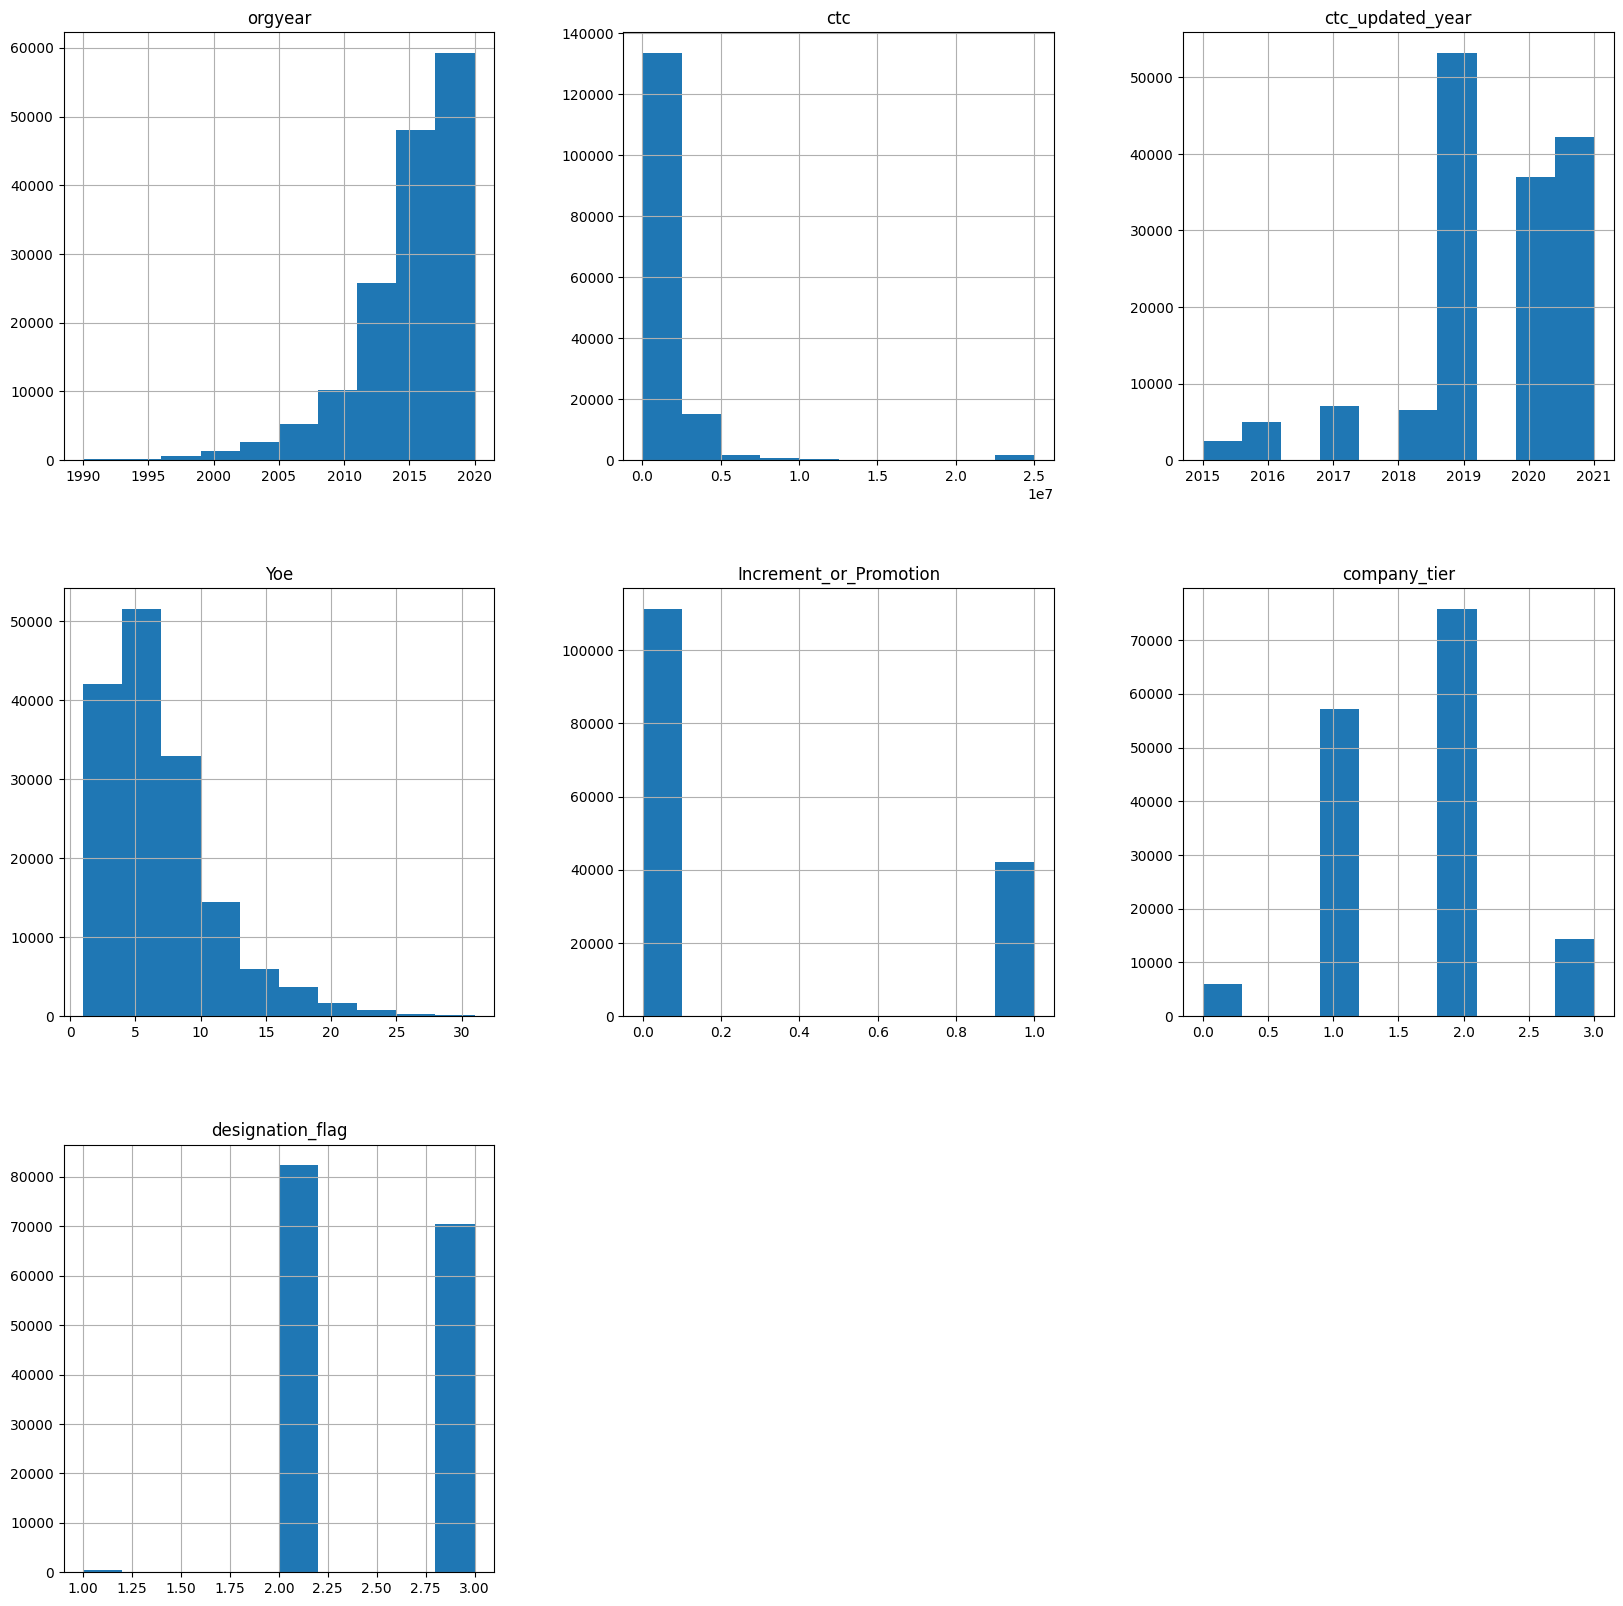

In [ ]:
df.hist(figsize=(20,20))
plt.plot()

## Summary of Histograms for Key Features

---

**1. orgyear (Year of Joining Company)**  
- **Distribution**: Left-skewed  
- **Insight**:  
  - Most learners joined their current company between **2013 and 2018**.  
  - Very few joined before 2000.  
  - Peak likely around **2016**.  

---

**2. ctc (Current Total Compensation)**  
- **Distribution**: Right-skewed / Long tail  
- **Insight**:  
  - Most learners earn between **₹5.5L and ₹17L**.  
  - Some outliers earn very high CTCs (up to ₹2.5Cr).  
  - Consider **log transformation** to normalize for modeling.  

---

**3. ctc_updated_year**  
- **Distribution**: Slightly right-skewed  
- **Insight**:  
  - Most CTCs were last updated between **2019 and 2021**.  
  - Indicates recent salary revisions or promotions.  

---

**4. Yoe (Years of Experience)**  
- **Distribution**: Slight right-skew  
- **Insight**:  
  - Majority have **7–12 years** of experience.  
  - Some learners have up to **55 years**, possibly outliers or veterans.  

---

**5. company_tier**  
- **Distribution**: Categorical (values: 1, 2, 3)  
- **Insight**:  
  - Most learners belong to **Tier 2 companies**.  
  - Fewer are from Tier 1 or Tier 3.  

---

**6. designation_flag**  
- **Distribution**: Categorical (1: Junior, 2: Mid, 3: Senior)  
- **Insight**:  
  - Majority are **Mid-level (2)** professionals.  
  - Fewer Junior (1) and Senior (3) level learners.  
  - Indicates a balanced but experienced user base.  

---

**Key Takeaways**  
- Features like **CTC** and **experience** are **skewed** and need transformations for better modeling.  
- Engineered features like **company_tier** and **designation_flag** help in **grouping learners** effectively for clustering or personalization tasks.


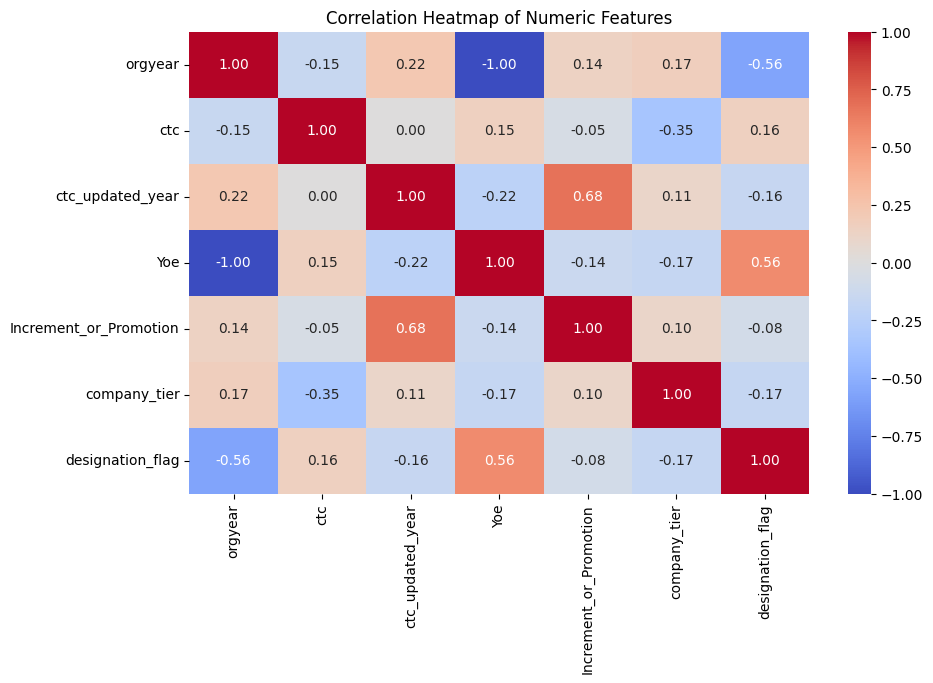

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


**Key Observations from Correlation Table**

- **orgyear vs Yoe**: -1.00  
  Perfect negative correlation. Earlier joining year means more years of experience.

- **ctc vs company_tier**: -0.35  
  Moderate negative correlation. Higher-tier companies (like Tier 1) tend to pay better.

- **Yoe vs designation_flag**: 0.50  
  Moderate positive correlation. More experienced individuals usually have higher designations.

- **orgyear vs designation_flag**: -0.50  
  Earlier joiners tend to have higher designations.

- **ctc vs designation_flag**: 0.15  
  Weak positive correlation. Higher designations may earn more, but many other factors affect salary.

- **ctc_updated_year vs others**:  
  Very weak correlations. The year of last CTC update is not significantly related to salary or experience.

- **company_tier vs designation_flag**: -0.17  
  Slight negative correlation. Higher designations may appear more frequently in lower-tier firms due to flatter hierarchies.


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category,company_tier,designation_flag
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0,Average,1,3
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0,Low,3,3
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0,Average,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1,Average,1,3
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0,Average,1,3


In [ ]:
# Top 10 companies with highest number of employess and their avg CTC

top_companies_by_employment_and_ctc = df.groupby('company_hash').agg(
    employees=('email_hash', 'count'),
    avg_ctc=('ctc', 'mean')
).sort_values(by='employees', ascending=False).head(10)

print(top_companies_by_employment_and_ctc)


                           employees       avg_ctc
company_hash                                      
nvnv wgzohrnvzwj otqcxwto       5241  9.009418e+05
xzegojo                         3455  8.295535e+05
vbvkgz                          2556  2.607757e+06
zgn vuurxwvmrt vwwghzn          2291  1.410880e+06
wgszxkvzn                       2189  1.051537e+06
vwwtznhqt                       1960  1.189447e+06
gqvwrt                          1747  1.648807e+06
fxuqg rxbxnta                   1721  1.087031e+06
bxwqgogen                       1563  2.962609e+06
wvustbxzx                       1356  8.665417e+05


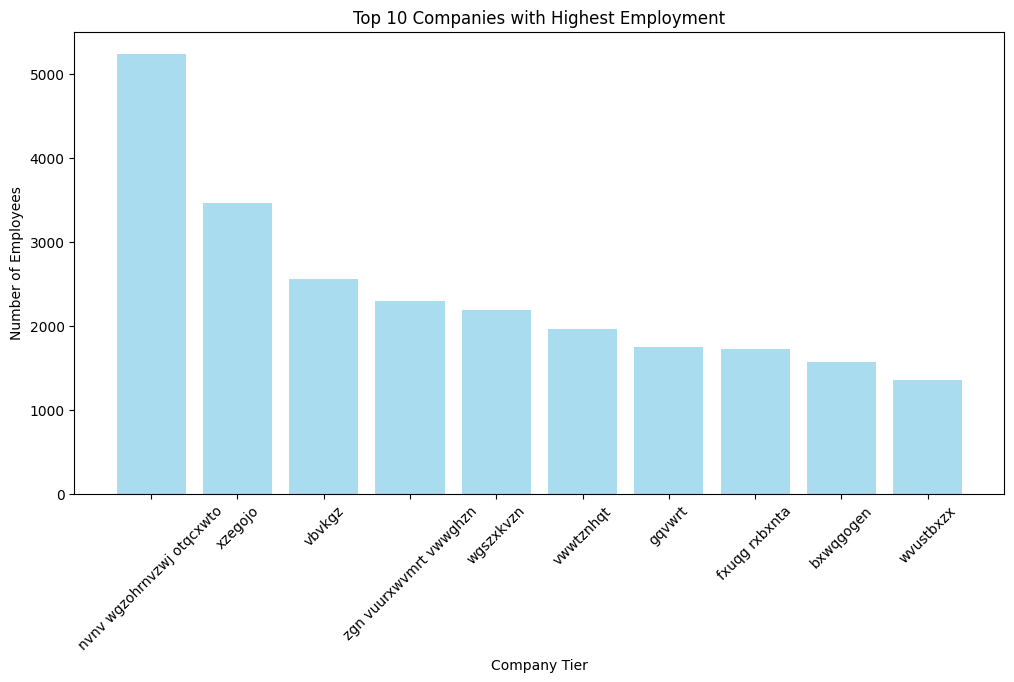

In [ ]:
# Plot top companies by employment without average CTC
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for employees
ax1.bar(top_companies_by_employment_and_ctc.index, top_companies_by_employment_and_ctc['employees'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Company Tier')
ax1.set_ylabel('Number of Employees')
ax1.tick_params(axis='y')

plt.title('Top 10 Companies with Highest Employment')
plt.xticks(rotation=45)
plt.show()


**Summary for the Top 10 Companies with Highest Employment and Their Average CTC**

1. **Company Employment**:
   - The company with the highest employment is **nvnv wgzohrnvzwj otqcxwto** with **5241 employees**, and the company with the lowest employment in the top 10 is **wvustbxzx** with **1356 employees**.
   - The employment numbers vary significantly across these companies, with the largest companies having over **5000 employees** and the smallest ones having just over **1300 employees**.

2. **Average CTC**:
   - **Average CTC** varies widely between companies. The **highest average CTC** is observed in **bxwqgogen** with **2.96 million**.
   - The **lowest average CTC** is seen in **nvnv wgzohrnvzwj otqcxwto** with an average of approximately **900k**.
   - Other companies show **average CTCs** ranging from **800k to 2.6 million**, indicating that the CTC distribution is quite diverse across companies.

3. **High Employment and High CTC**:
   - Some companies, like **bxwqgogen**, **gqvwrt**, and **vbvkgz**, have relatively high **average CTCs** alongside a substantial number of employees.
   - **bxwqgogen**, despite having **1563 employees**, stands out with the **highest average CTC** of **2.96 million**, which might suggest it is a highly profitable or prestigious company offering high compensation packages.

4. **High Employment but Lower CTC**:
   - Companies like **nvnv wgzohrnvzwj otqcxwto** and **wvustbxzx** have large numbers of employees but relatively **lower average CTCs** (around **900k to 800k**). These could be larger organizations where salaries may vary based on roles, or they could be in sectors where compensation is relatively lower.

5. **Mid-range Employment with Varied CTC**:
   - Companies like **zgn vuurxwvmrt vwwghzn**, **wgszxkvzn**, and **vwwtznhqt** have moderate to high employment with **CTCs** in the **1 million to 1.5 million range**. These companies might offer competitive salaries, especially when compared to companies with larger but lower-paying workforces.

**Insights**:
- The **top companies** with **highest employment** often have a **diverse range of salaries**, and this suggests that employment size alone is not an indicator of salary distribution. The companies with the most employees don't always have the highest **average CTC**.
- Some companies, especially those with a **smaller workforce**, may offer higher average compensation, possibly due to the specialized roles they hire for or their overall industry positioning.


In [ ]:
# Top 10 job positions with highest number of employees and their average CTC

top_jobs_by_employment_and_ctc = df.groupby('job_position').agg(
    employees=('email_hash', 'count'),
    avg_ctc=('ctc', 'mean')
).sort_values(by='employees', ascending=False).head(10)

print(top_jobs_by_employment_and_ctc)


                        employees       avg_ctc
job_position                                   
Unknown                     33767  1.441817e+06
Backend Engineer            33286  1.684655e+06
FullStack Engineer          17194  1.446856e+06
Other                       13802  1.760043e+06
Frontend Engineer            8341  1.324380e+06
Engineering Leadership       5940  3.074593e+06
QA Engineer                  5696  1.221532e+06
Data Scientist               4640  1.634289e+06
Android Engineer             4608  1.236709e+06
SDET                         4343  1.136803e+06


<ipython-input-57-720cfeec37dc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_jobs_by_employment_and_ctc = df.groupby('job_position').agg(


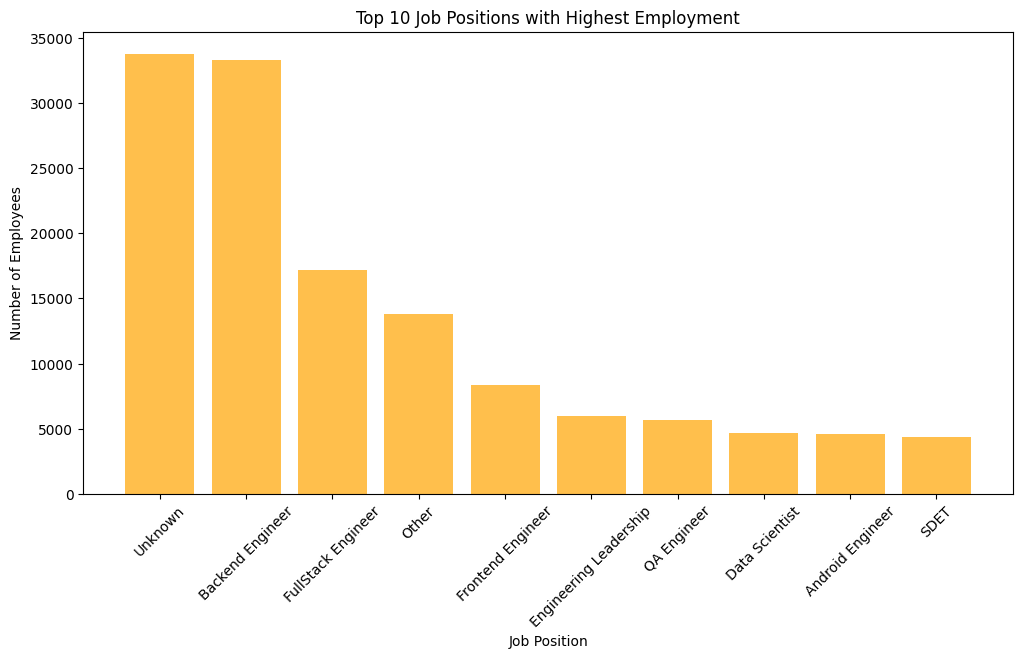

In [ ]:
# Plot top job positions by employment without average CTC
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for employees
ax1.bar(top_jobs_by_employment_and_ctc.index, top_jobs_by_employment_and_ctc['employees'], color='orange', alpha=0.7)
ax1.set_xlabel('Job Position')
ax1.set_ylabel('Number of Employees')
ax1.tick_params(axis='y')

plt.title('Top 10 Job Positions with Highest Employment')
plt.xticks(rotation=45)
plt.show()


**Summary for the Top 10 Job Positions with Highest Employment and Their Average CTC**

1. **Job Position Employment**:
   - The job position with the highest employment is **Backend Engineer** with **33,286 employees**, followed by **FullStack Engineer** with **17,194 employees**.
   - The job positions with the lowest employment in the top 10 are **SDET** with **4,343 employees** and **Android Engineer** with **4,608 employees**.

2. **Average CTC**:
   - The **highest average CTC** is for **Engineering Leadership** with an average of **3.07 million**, reflecting the premium compensation for leadership roles.
   - The **lowest average CTC** is for **QA Engineer** with **1.22 million**, indicating that QA roles typically command lower compensation than engineering roles.
   - The **average CTC** for roles like **Backend Engineer** and **FullStack Engineer** range from **1.44 million to 1.68 million**, making them relatively well-compensated positions.

3. **High Employment and High CTC**:
   - **Backend Engineer** and **FullStack Engineer** have high employment numbers with **average CTCs** of **1.44 million** and **1.45 million**, respectively. This suggests that these positions are both common and well-compensated in the tech industry.
   - **Engineering Leadership** stands out with a significantly higher **CTC** of **3.07 million**, despite having a smaller number of employees, reflecting the high value placed on leadership roles.

4. **Moderate Employment with Competitive CTC**:
   - Roles like **Data Scientist** and **Android Engineer** have moderate employment numbers (around **4,600 to 4,700 employees**) with **CTCs** ranging from **1.23 million to 1.63 million**. These specialized roles offer competitive salaries, likely due to the expertise and demand for such skills.

5. **Common Roles with Lower CTC**:
   - **QA Engineer** and **SDET** are common positions in tech organizations but offer relatively lower **CTCs**. Their **average CTCs** are around **1.13 million to 1.22 million**, reflecting the routine or less specialized nature of the work compared to engineering or leadership roles.

**Insights:**
- **Engineering Leadership** roles command the **highest average CTC**, indicating the importance and value of leadership positions in the industry.
- **Backend Engineers** and **FullStack Engineers** are in high demand, with high employment numbers and competitive **CTCs**, making them key roles in tech companies.
- **Data Scientist** and **Android Engineer** roles offer specialized skills and competitive salaries, though they have fewer employees compared to general engineering roles.
- **QA Engineer** and **SDET** positions have relatively lower **CTCs**, suggesting they might be viewed as more routine or entry-level roles in comparison to engineering or leadership positions.


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category,company_tier,designation_flag
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0,Average,1,3
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0,Low,3,3
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0,Average,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1,Average,1,3
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0,Average,1,3


In [ ]:
df_fe=df.copy()

# **Model Building**

In [ ]:
#Dropping some of the derived columns created of EDA

df.drop(['role_category','ctc_category','company_tier','designation_flag'],axis=1,inplace=True)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Yoe,Increment_or_Promotion
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,9.0,0
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,8.0,0
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,7.0,0
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,17.0,1
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,12.0,0


In [ ]:
#Dropping columns which doesn't contribute to clustering

df.drop(['email_hash','orgyear','ctc_updated_year'],axis=1,inplace=True)

In [ ]:
df_untransformed=df.copy()

In [ ]:
df.head()

,company_hash,ctc,job_position,Yoe,Increment_or_Promotion
0,bxwqgogen,3500000,Backend Engineer,9.0,0
1,nqsn axsxnvr,250000,Backend Engineer,8.0,0
2,gunhb,1300000,Unknown,7.0,0
3,bxwqgotbx wgqugqvnxgz,2000000,FullStack Engineer,17.0,1
4,fvrbvqn rvmo,3400000,Unknown,12.0,0


In [ ]:

# Frequency encoding for company_hash
company_hash_freq = df['company_hash'].value_counts().to_dict()
df['company_hash_encoded'] = df['company_hash'].map(company_hash_freq)

# Frequency encoding for job_position
job_position_freq = df['job_position'].value_counts().to_dict()
df['job_position_encoded'] = df['job_position'].map(job_position_freq)

In [ ]:
df.drop(['company_hash','job_position'],axis=1,inplace=True)

In [ ]:
df.head()

,ctc,Yoe,Increment_or_Promotion,company_hash_encoded,job_position_encoded
0,3500000,9.0,0,1563,33286
1,250000,8.0,0,1,33286
2,1300000,7.0,0,157,33767
3,2000000,17.0,1,11,17194
4,3400000,12.0,0,581,33767


Applying Log Transformation on ctc column since it is right skewed. Since skewness can affect performance of clustering algorithms

In [ ]:
df['ctc'] = np.log1p(df['ctc']).round(2)

In [ ]:
df.head()

,ctc,Yoe,Increment_or_Promotion,company_hash_encoded,job_position_encoded
0,15.07,9.0,0,1563,33286
1,12.43,8.0,0,1,33286
2,14.08,7.0,0,157,33767
3,14.51,17.0,1,11,17194
4,15.04,12.0,0,581,33767


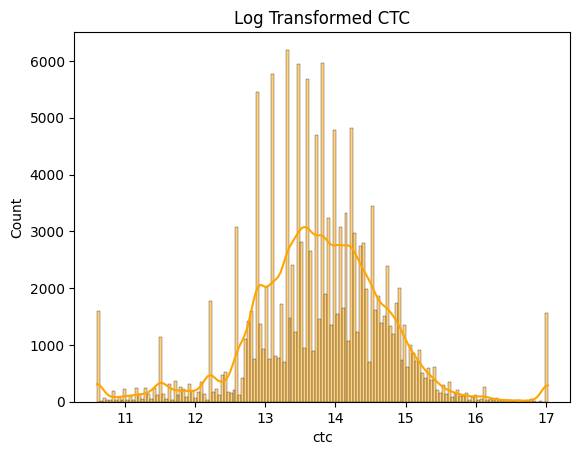

In [ ]:
sns.histplot(df['ctc'], kde=True,color='orange')
plt.title('Log Transformed CTC')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df = pd.DataFrame(df_scaled, columns=df.columns)

df.head()


,ctc,Yoe,Increment_or_Promotion,company_hash_encoded,job_position_encoded
0,1.330955,0.635696,-0.615531,0.840583,1.052523
1,-1.357354,0.398408,-0.615531,-0.500268,1.052523
2,0.322839,0.161119,-0.615531,-0.366355,1.089002
3,0.760708,2.534003,1.624613,-0.491684,-0.167893
4,1.300406,1.347561,-0.615531,-0.002385,1.089002


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import NearestNeighbors
def hopkins_statistic(X):
    X = np.array(X)  # Ensure X is a numpy array
    d = X.shape[1]  # Number of dimensions
    n = len(X)  # Number of data points
    m = int(0.1 * n)  # Subset size (10% of the data points)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.random((m, d)) * np.amax(X, axis=0)
    u_distances, _ = nbrs.kneighbors(rand_X, 2, return_distance=True)

    w_distances, _ = nbrs.kneighbors(X[np.random.choice(n, m, replace=False)], 2, return_distance=True)

    u_distances = u_distances[:, 1]
    w_distances = w_distances[:, 1]

    H = (np.sum(u_distances) / (np.sum(u_distances) + np.sum(w_distances)))
    return H

hopkins_score = hopkins_statistic(X_train)
print(f"Hopkins Statistic: {hopkins_score}")

Hopkins Statistic: 0.9738137528182121


**K Means Clustering**

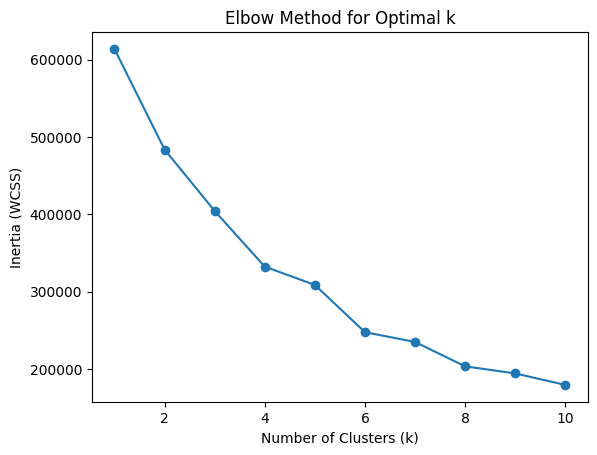

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # X is your feature matrix
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


**AT k=4 we can see the decrease in inertia has been slowed down. So we will choose k=4**

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)


KMeans(n_clusters=4, random_state=42)

In [ ]:
train_labels = kmeans.labels_  # Cluster labels for training set
test_labels = kmeans.predict(X_test)  # Predict cluster labels for validation set


In [ ]:
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Training Labels:\n", train_labels)
print("Validation Labels:\n", test_labels)


Cluster Centers:
 [[-0.23198742 -0.32835065 -0.61553123 -0.26346665  0.11522074]
 [-0.13828088 -0.33462981  1.62461294 -0.07768147  0.23834794]
 [-0.42579093 -0.48214331  0.19004452  3.10593832  0.25670562]
 [ 0.82096905  1.28404893 -0.47349232 -0.29487235 -0.61171317]]
Training Labels:
 [2 1 1 ... 0 0 1]
Validation Labels:
 [0 0 0 ... 0 0 0]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


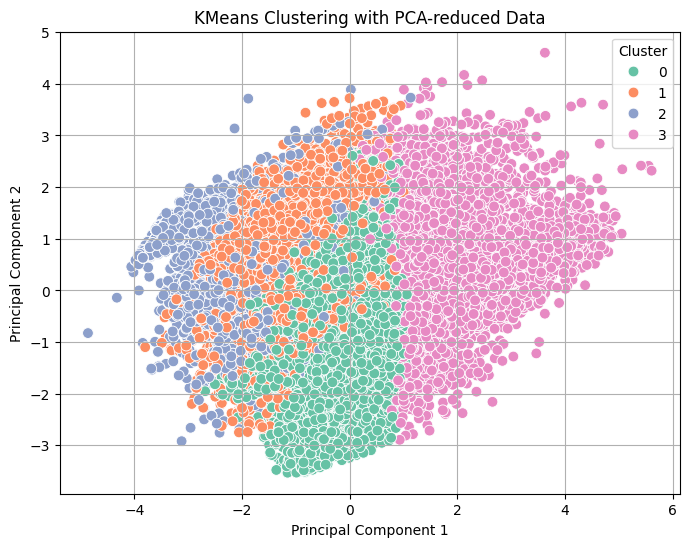

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=train_labels, palette='Set2', s=60)
plt.title('KMeans Clustering with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


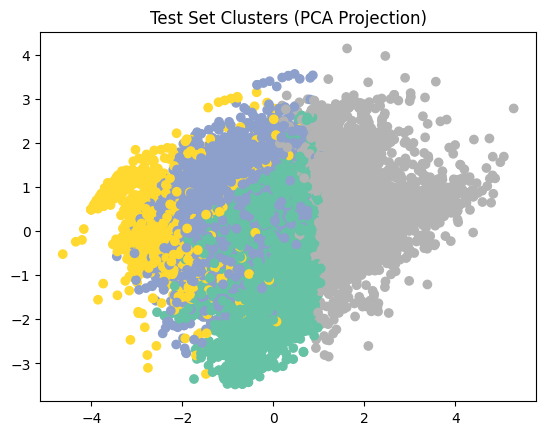

In [ ]:
# Example with PCA on test set
X_test_pca = PCA(n_components=2).fit_transform(X_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='Set2')
plt.title("Test Set Clusters (PCA Projection)")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

#score = silhouette_score(X_train, train_labels)
#print(f"Silhouette Score on Train Set: {score:.3f}")

#Silhouette Score on Train Set: 0.272


In [ ]:
score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score on Test Set: {score:.3f}")

Silhouette Score on Test Set: 0.274


**Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
df.shape

(153443, 5)

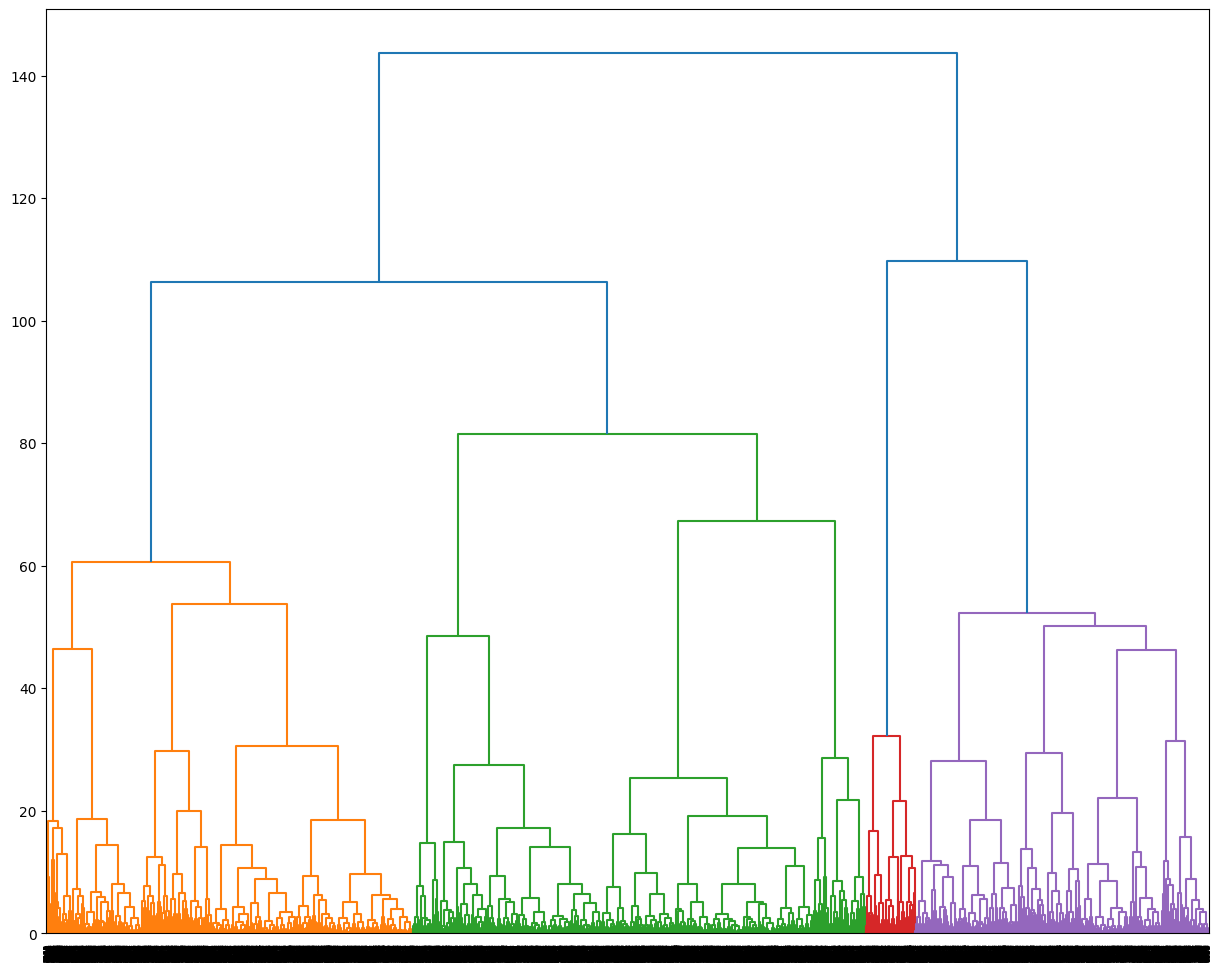

In [ ]:

# Sample a subset of the data
df_sampled = df.sample(n=10000, random_state=42)

# Perform hierarchical clustering
Z = linkage(df_sampled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 12))
dendrogram(Z)
plt.show()

**Dendrogram also clearly showing 4 clusters for the dataset**

**Evaluation of K-means Clustering**

In [ ]:
wcss = kmeans.inertia_
print(f'Within-Cluster Sum of Squares (WCSS): {wcss}')

Within-Cluster Sum of Squares (WCSS): 332286.00061012694


In [ ]:
df.head()

,ctc,Yoe,Increment_or_Promotion,company_hash_encoded,job_position_encoded
0,1.330955,0.635696,-0.615531,0.840583,1.052523
1,-1.357354,0.398408,-0.615531,-0.500268,1.052523
2,0.322839,0.161119,-0.615531,-0.366355,1.089002
3,0.760708,2.534003,1.624613,-0.491684,-0.167893
4,1.300406,1.347561,-0.615531,-0.002385,1.089002


In [ ]:
df['kmeans_cluster']=kmeans.predict(df)

In [ ]:
df.head()

,ctc,Yoe,Increment_or_Promotion,company_hash_encoded,job_position_encoded,kmeans_cluster
0,1.330955,0.635696,-0.615531,0.840583,1.052523,3
1,-1.357354,0.398408,-0.615531,-0.500268,1.052523,0
2,0.322839,0.161119,-0.615531,-0.366355,1.089002,0
3,0.760708,2.534003,1.624613,-0.491684,-0.167893,3
4,1.300406,1.347561,-0.615531,-0.002385,1.089002,3


In [ ]:
# Between-Cluster Sum of Squares (BCSS)
def calculate_bcss(df, kmeans):
    cluster_centers = kmeans.cluster_centers_
    overall_mean = df.drop(columns='kmeans_cluster').mean(axis=0)
    bcss = 0
    for i, center in enumerate(cluster_centers):
        size = len(df[df['kmeans_cluster'] == i])
        bcss += size * np.sum((center - overall_mean) ** 2)
    return bcss

bcss = calculate_bcss(df, kmeans)
print(f'Between-Cluster Sum of Squares (BCSS): {bcss}')


Between-Cluster Sum of Squares (BCSS): 352218.9408388392


In [ ]:
overall_mean = np.mean(X_train, axis=0)

# Initialize BCSS
bcss = 0

# Loop through each cluster
for label in np.unique(train_labels):
    cluster_points = X_train[train_labels == label]
    cluster_size = cluster_points.shape[0]
    cluster_mean = np.mean(cluster_points, axis=0)

    # BCSS for this cluster
    bcss += cluster_size * np.sum((cluster_mean - overall_mean) ** 2)

print(f"Between-Cluster Sum of Squares (BCSS): {bcss}")

Between-Cluster Sum of Squares (BCSS): 281764.1800467227


High BCSS and Low WCSS: The combination of a relatively high BCSS and a relatively low WCSS is desirable. It means that the clusters are well-separated and compact.

In [ ]:
cluster_sizes = df['kmeans_cluster'].value_counts().sort_index()
print(f'Cluster Sizes:\n{cluster_sizes}')

Cluster Sizes:
kmeans_cluster
0    74176
1    36412
2    10331
3    32524
Name: count, dtype: int64


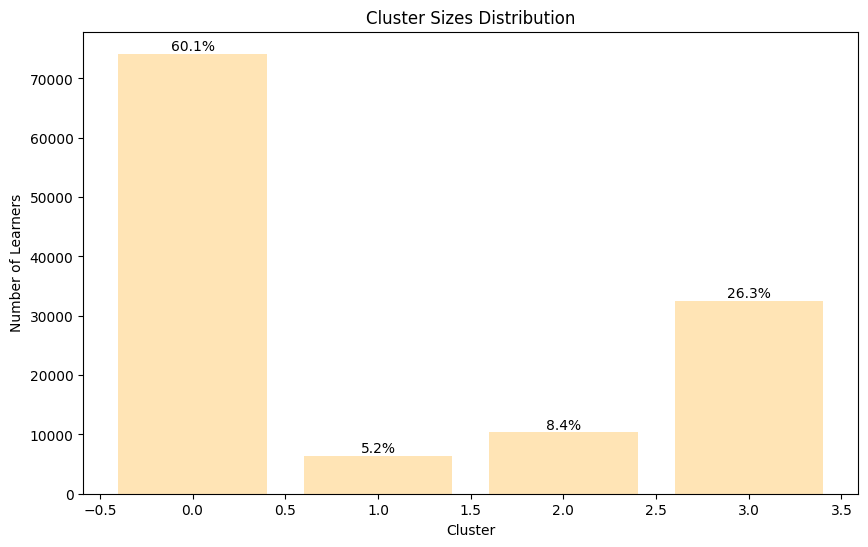

In [ ]:
# Assuming cluster sizes are stored in a dictionary
cluster_sizes = {0: 74176, 1: 6412, 2: 10331, 3: 32524}

# Calculate the total number of learners
total_learners = sum(cluster_sizes.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_sizes.keys(), cluster_sizes.values(), color='moccasin')

# Add percentage labels above the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_learners) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Learners')
plt.title('Cluster Sizes Distribution')
plt.show()


# **4. Results Interpretation & Stakeholder Presentation**

In [ ]:
df_untransformed['kmeans_cluster']=df['kmeans_cluster']

In [ ]:
from collections import Counter
import pandas as pd

# Assuming your DataFrame is now named `df_unscaled`

# Function to get the most common encoded values for job positions and companies in each cluster
def get_common_entries(df, cluster_label, column_name, top_n=3):
    cluster_data = df[df['kmeans_cluster'] == cluster_label]
    most_common_entries = Counter(cluster_data[column_name]).most_common(top_n)
    return most_common_entries

# Compute average values for each cluster
cluster_averages = df_untransformed.groupby('kmeans_cluster')[['ctc', 'Yoe', 'Increment_or_Promotion']].mean()

# Prepare cluster profiles
cluster_profiles = {}

for cluster in range(4):
    job_positions = get_common_entries(df_untransformed, cluster, 'job_position')
    companies = get_common_entries(df_untransformed, cluster, 'company_hash')

    cluster_profiles[cluster] = {
        'average_ctc': cluster_averages.loc[cluster, 'ctc'],
        'average_yoe': cluster_averages.loc[cluster, 'Yoe'],
        'average_increment_or_promotion': cluster_averages.loc[cluster, 'Increment_or_Promotion'],
        'common_job_positions': job_positions,
        'common_companies': companies
    }

# Display the cluster summaries
for cluster, profile in cluster_profiles.items():
    print(f"\nCluster {cluster}:")
    print(f"  Average Compensation (CTC): {profile['average_ctc']:.2f}")
    print(f"  Average Years of Experience: {profile['average_yoe']:.2f}")
    print(f"  Average Increment or Promotion Value: {profile['average_increment_or_promotion']:.2f}")
    print("  Common Job Positions (encoded):")
    for job, count in profile['common_job_positions']:
        print(f"    - {job}: {count} occurrences")
    print("  Common Companies (encoded):")
    for company, count in profile['common_companies']:
        print(f"    - {company}: {count} occurrences")



Cluster 0:
  Average Compensation (CTC): 1078808.69
  Average Years of Experience: 4.94
  Average Increment or Promotion Value: 0.00
  Common Job Positions (encoded):
    - Backend Engineer: 19970 occurrences
    - Unknown: 16173 occurrences
    - FullStack Engineer: 8574 occurrences
  Common Companies (encoded):
    - wgszxkvzn: 1180 occurrences
    - vwwtznhqt: 1015 occurrences
    - fxuqg rxbxnta: 938 occurrences

Cluster 1:
  Average Compensation (CTC): 1236333.06
  Average Years of Experience: 4.91
  Average Increment or Promotion Value: 1.00
  Common Job Positions (encoded):
    - Unknown: 11694 occurrences
    - Backend Engineer: 7501 occurrences
    - FullStack Engineer: 5399 occurrences
  Common Companies (encoded):
    - zgn vuurxwvmrt vwwghzn: 2021 occurrences
    - wgszxkvzn: 837 occurrences
    - zvz: 818 occurrences

Cluster 2:
  Average Compensation (CTC): 1020066.99
  Average Years of Experience: 4.28
  Average Increment or Promotion Value: 0.36
  Common Job Positions 

**Cluster 0:**  
This cluster consists of individuals with moderate experience (around 4.9 years) and moderate average compensation (~₹10.8 LPA).  
No one in this cluster has received any promotions or increments, suggesting early-career stagnation.  
**Backend Engineers** dominate, followed by **Unknown** and **FullStack Engineers**, indicating many are in technical roles, though some job roles remain ambiguous.  
Top employers include **wgszxkvzn**, **vwwtznhqt**, and **fxuqg rxbxnta**.

**Cluster 1:**  
These individuals also average around 4.9 years of experience but earn slightly higher compensation (~₹12.4 LPA).  
Everyone has experienced at least one promotion or increment, reflecting upward career mobility.  
While **Unknown roles** remain high, **Backend** and **FullStack Engineers** are significant.  
Top companies like **zgn vuurxwvmrt vwwghzn**, **wgszxkvzn**, and **zvz** suggest overlap with Cluster 0 but with higher growth opportunities.

**Cluster 2:**  
This group has slightly less experience ( around 4.3 years) and the lowest average compensation (~₹10.2 LPA).  
Only about 36% have received promotions, indicating mixed career trajectories.  
Job titles include **Unknown**, **Backend Engineer**, and **Other**.  
Key employers are **nvnv wgzohrnvzwj otqcxwto**, **xzegojo**, and **vbvkgz**.

**Cluster 3:**  
This cluster represents **highly experienced professionals (~11.7 years)** with **significantly high compensation (~₹33.5 LPA)**.  
Promotion activity is very low (6%), likely because they already occupy top-tier roles.  
Dominant roles include **Engineering Leadership**, **Backend**, and **Frontend Engineers**.  
Major employers such as **bxwqgogen**, **gqvwrt**, and **vbvkgz** suggest elite or specialized organizations.



# **4. Results Interpretation & Stakeholder Presentation**

# Clustering for Learner Profiling & Company Profiling

## a. Understanding the Business Context

The business context for this clustering analysis revolves around **learner profiling and company profiling** at Scaler. As an emerging tech university, Scaler aims to offer world-class education in computer science and data science domains. The key challenge is to **understand the diverse backgrounds** of its learners, particularly regarding their current roles, companies, and experience. This understanding can help Scaler provide more **personalized and relevant learning experiences**, thus increasing learner retention and satisfaction.

The goal is to **segment learners based on their professional backgrounds** to enable Scaler to:
- Offer tailored content recommendations
- Provide specialized mentorship
- Optimize learning paths for different learner profiles

By using clustering techniques, Scaler can group learners who share similar characteristics and needs, ensuring a more **customized educational journey**.

## b. Insights from Unsupervised Clustering

Unsupervised clustering, while not providing explicit performance metrics like supervised learning, offers valuable insights into the **underlying structure of the data**. By analyzing each cluster, we can derive key patterns that highlight different learner personas, company affiliations, and professional backgrounds.

### **a. Main Goals Behind Clustering**
The main goal behind clustering in this case is to:
1. **Segment learners based on their professional profiles** – This helps Scaler tailor its educational offerings to specific groups of learners, making the learning experience more relevant and personalized.
2. **Understand user behavior** – The clusters can reveal distinct behaviors, such as promotion patterns, common job positions, and company affiliations, enabling Scaler to better align its content and mentorship offerings with the learners' professional aspirations.
3. **Find patterns in professional backgrounds** – By analyzing clustering results, Scaler can identify whether certain learner profiles tend to belong to specific companies or roles, and use this information for better-targeted learning strategies.

### **b. Value of Each Cluster**
Each cluster represents a unique group of learners with distinct characteristics:
- **Cluster 0 & 1**: These clusters consist of mid-level engineers (mainly Backend and FullStack Engineers). Their compensation and experience are relatively similar, but the difference in increments indicates varying levels of career progression. These learners could benefit from courses that help them transition into leadership or more specialized technical roles.
- **Cluster 2**: This cluster represents learners with slightly less compensation and experience. The inclusion of “Other” as a common job position suggests that these learners might not be in standard engineering roles. Scaler could focus on broadening their skill sets and preparing them for higher-level engineering roles or new career tracks.
- **Cluster 3**: This cluster includes senior-level professionals with significant experience and high compensation. They likely hold leadership positions and could benefit from advanced learning opportunities in management, strategy, or cutting-edge technologies.

Each cluster helps Scaler better understand learner needs and behaviors, enabling **targeted curriculum design** and **mentorship opportunities**.

### **a. Profiling Each Cluster**

#### **Cluster 0** (Mid-level Engineers with Stable Roles)
- **Job Positions**: Primarily Backend Engineer and FullStack Engineer, with a large number of “Unknown” entries (possibly due to missing or unclassified roles).
- **Average Experience**: Around 4.94 years.
- **Average Compensation**: ₹1,078,808.69, indicating mid-level professionals.
- **Key Insight**: Learners in this cluster likely need **skill enhancement** or **career development** programs to transition into more senior roles.

#### **Cluster 1** (Mid-level Engineers with Some Promotions)
- **Job Positions**: Backend and FullStack Engineers, with many “Unknown” roles.
- **Average Experience**: 4.91 years, similar to Cluster 0.
- **Average Compensation**: ₹1,236,333.06, slightly higher than Cluster 0, possibly due to promotions or recent increments.
- **Key Insight**: This group could benefit from **advanced technical tracks** or mentorship in transitioning into leadership roles or more specialized engineering fields.

#### **Cluster 2** (Junior to Mid-level Engineers with Some Career Growth)
- **Job Positions**: Backend Engineer, Other, and Unknown.
- **Average Experience**: 4.28 years, slightly less than Clusters 0 and 1.
- **Average Compensation**: ₹1,020,066.99, which is the lowest among all clusters.
- **Key Insight**: Learners in this cluster may need foundational technical training or career guidance, as their roles may vary, and their compensation is lower. Scaler could offer **fundamental courses** or **career switch pathways**.

#### **Cluster 3** (Senior Engineers and Leadership)
- **Job Positions**: Engineering Leadership, Backend Engineer, Frontend Engineer.
- **Average Experience**: 11.71 years, indicating a significant amount of industry experience.
- **Average Compensation**: ₹3,352,792.01, much higher than the other clusters, suggesting high-level professionals.
- **Key Insight**: This cluster requires **advanced training** in leadership, management, and possibly niche technologies. They may also benefit from **executive coaching** or courses on strategic thinking.

### **b. Central Tendencies (Mean/Median of Features)**

- **Compensation (CTC)**:
  - Cluster 3 stands out with the highest average compensation, highlighting senior or leadership roles.
  - Clusters 0 and 1 have mid-range compensation, with Cluster 1 slightly ahead due to the promotion/increment factor.
  - Cluster 2 has the lowest average compensation, pointing to junior or less specialized roles.

- **Experience**:
  - Cluster 3 has the most experience, reflecting senior professionals.
  - Clusters 0 and 1 have relatively similar experience levels, suggesting these are mid-level professionals.
  - Cluster 2 has the least experience, reflecting the early or mid-career stages of learners.

- **Increment/Promotion Value**:
  - Cluster 1 has the highest increment value, suggesting that many in this cluster have recently received promotions or pay increases.
  - Clusters 0 and 2 show no significant increments, implying relatively stable or stagnant positions.
  - Cluster 3 has the lowest increment value, possibly indicating that these professionals have already reached senior or leadership levels where further salary increments are less frequent.

## Final Insights:
Clustering helps Scaler segment learners based on their **career trajectory** and **current professional status**. The clusters reveal that:
- Mid-level professionals (Clusters 0 and 1) need upskilling for career progression.
- Cluster 2 requires foundational courses or more specific career paths.
- Cluster 3, with senior professionals, may benefit from executive-level programs focusing on leadership and advanced skills.

By tailoring educational offerings to these clusters, Scaler can enhance learner satisfaction, retention, and outcomes.


### **Trade-off Analysis**

#### a. **Cost of Targeting High-Value Cluster vs. ROI**

**Costs**:
- **Customized content** and **mentorship** for high-value clusters (e.g., Cluster 3) require significant resources.
- **Higher marketing costs** to attract experienced professionals.

**ROI**:
- **Higher revenue** from premium pricing.
- **Loyalty and referrals** from experienced learners.
- **Long-term engagement** opportunities.

**Conclusion**: Targeting high-value clusters offers high ROI but requires careful management of initial costs.

---

#### b. **Tailored Experience vs. Generalized Approach**

**Tailored Experience**:
- **Benefits**: Personalized content increases engagement and satisfaction.
- **Challenges**: High cost and scalability issues.

**Generalized Approach**:
- **Benefits**: Broad reach and cost efficiency.
- **Challenges**: Lower engagement and reduced differentiation.

**Conclusion**: Tailored experiences are ideal for high-value clusters, while a generalized approach works for broader segments. A **hybrid strategy** may balance both.


### Cluster-wise Actionable Recommendations

---

#### **Cluster 0: Mid-Level Engineers (Low Increment/Promotion Value)**

- **Increase Purchase Frequency**:
  - **Targeted Upskilling**: Offer courses on **advanced technical skills** to increase engagement. Introduce **special promotions** for mid-career professionals.
  - **Mentorship Programs**: Develop mentorship opportunities focused on **career progression** to encourage return visits for career advancement.

- **Retention Strategy**:
  - **Engagement Campaigns**: Send **personalized notifications** about new courses that align with mid-level engineering roles (e.g., FullStack Engineering).
  - **Feedback Loops**: Regularly gather feedback to address any barriers to continued learning.

- **Targeted Marketing**:
  - Highlight **career progression** content (e.g., leadership skills, advanced technical training) to this cluster, encouraging them to invest in more advanced courses.

---

#### **Cluster 1: Professionals with High Compensation (Promotion/Increment Occurs)**

- **Increase Purchase Frequency**:
  - **Premium Offerings**: Provide **premium learning tracks** and **exclusive content** targeted at professionals who already have high compensation.
  - **Upsell Advanced Programs**: Encourage participation in **executive or leadership courses**, positioning Scaler as a **premium learning platform**.

- **Retention Strategy**:
  - **Exclusive Loyalty Programs**: Offer **loyalty programs** or **certification programs** that add value to their career development.
  - **Engage with Thought Leadership**: Provide access to **industry leader webinars** or **networking events** to increase loyalty.

- **Targeted Marketing**:
  - Focus on **high-level leadership courses** or **specialized certifications** that match their high-level job roles.

---

#### **Cluster 2: Learners with Moderate Compensation & Experience (Some Increment/Promotion)**

- **Increase Purchase Frequency**:
  - **Skill Gap Courses**: Offer content that helps learners **transition to higher-level roles** (e.g., FullStack Engineering).
  - **Progression-Based Engagement**: Provide **upskilling incentives** by offering a **certification track** that acknowledges career growth.

- **Retention Strategy**:
  - **Personalized Development Plans**: Offer **personalized learning paths** based on career growth aspirations, helping them feel more engaged.
  - **Career Support**: Provide **career counseling** or **job placement services** to enhance perceived value.

- **Targeted Marketing**:
  - Advertise **mid-level courses** and career transition support for roles such as **Backend Engineer** or **FullStack Engineer**.

---

#### **Cluster 3: Senior Engineers/Leadership Roles (High Compensation, Extensive Experience)**

- **Increase Purchase Frequency**:
  - **Leadership and Strategy Courses**: Offer **advanced leadership training**, **management courses**, or **strategic decision-making** programs tailored for senior professionals.
  - **Exclusive Networking Opportunities**: Promote **networking events** with other senior professionals to keep them engaged.

- **Retention Strategy**:
  - **Mentorship Opportunities**: Encourage senior professionals to **become mentors** or participate in **peer-to-peer learning** to keep them engaged.
  - **Specialized Content**: Introduce content aimed at **executive roles**, **corporate strategy**, or **innovative tech trends** that appeal to experienced professionals.

- **Targeted Marketing**:
  - Market **leadership programs** and **corporate training** that match their high-level roles and provide **exclusive access** to senior leadership content.


### **Feedback Loop**

#### a. **Regular Re-run of the Clustering Process**

- **Periodic Clustering**: Re-run the clustering process **quarterly** or **semi-annually** to ensure that the learner segments remain relevant and accurate.
- **Monitor Shifts in Behavior**: Regularly monitor shifts in learners' **compensation**, **job roles**, and **course preferences** as they evolve over time, which may lead to new emerging segments.
- **Dynamic Adjustments**: Use updated data from learner behaviors, such as new course enrollments and changes in job roles, to adapt to changing trends and refine existing clusters.

#### b. **Channels to Collect Data on Customer Feedback, Preferences, and Behaviors**

- **Surveys and Feedback Forms**: Implement regular **surveys** and **feedback forms** after course completion or engagement to capture learner satisfaction, learning preferences, and suggestions for improvements.
- **Course Interaction Data**: Use **in-platform analytics** to track learner activity, course views, interaction frequency, and completion rates to understand learner behavior and identify evolving trends.
- **Email and Notifications Feedback**: Collect data on **email open rates**, **click-through rates**, and **responses** to personalized content to assess learner preferences and refine future clustering.
- **Social Media and Forums**: Monitor social media channels, community forums, and discussion boards where learners share experiences, which can provide insights into their evolving needs.
- **Customer Support Interactions**: Analyze **support tickets** and interactions to understand pain points, barriers to engagement, and areas of interest to fine-tune clustering.

By incorporating continuous data collection and regular updates to the clustering process, Scaler can maintain highly accurate, responsive learner segments. This will ensure that the platform remains aligned with the changing needs and behaviors of its learners.


# **Questionnaire**

**1. What percentage of users fall into the largest cluster?**

Ans : 60.1%

**2. Comment on the characteristics that differentiate the primary clusters from each other.**

Ans :

 Cluster 0:
This cluster consists of individuals with moderate experience (around 4.9 years) and moderate average compensation (~₹10.8 LPA).
No one in this cluster has received any promotions or increments, suggesting early-career stagnation.
Backend Engineers dominate, followed by Unknown and FullStack Engineers, indicating many are in technical roles, though some job roles remain ambiguous.
Top employers include wgszxkvzn, vwwtznhqt, and fxuqg rxbxnta.

Cluster 1:
These individuals also average around 4.9 years of experience but earn slightly higher compensation (~₹12.4 LPA).
Everyone has experienced at least one promotion or increment, reflecting upward career mobility.
While Unknown roles remain high, Backend and FullStack Engineers are significant.
Top companies like zgn vuurxwvmrt vwwghzn, wgszxkvzn, and zvz suggest overlap with Cluster 0 but with higher growth opportunities.

Cluster 2:
This group has slightly less experience ( around 4.3 years) and the lowest average compensation (~₹10.2 LPA).
Only about 36% have received promotions, indicating mixed career trajectories.
Job titles include Unknown, Backend Engineer, and Other.
Key employers are nvnv wgzohrnvzwj otqcxwto, xzegojo, and vbvkgz.

Cluster 3:
This cluster represents highly experienced professionals (~11.7 years) with significantly high compensation (~₹33.5 LPA).
Promotion activity is very low (6%), likely because they already occupy top-tier roles.
Dominant roles include Engineering Leadership, Backend, and Frontend Engineers.
Major employers such as bxwqgogen, gqvwrt, and vbvkgz suggest elite or specialized organizations.

**3. Is it always true that with an increase in years of experience, the CTC increases? Provide a case where this isn't true.**

Ans:

No, it is not always true that with an increase in years of experience (YOE), the CTC (Compensation to the Company) increases. Several factors can influence this relationship, and there can be cases where more experience does not correlate with higher compensation.

Example Case Where This Isn't True:

Cluster 2 (with lower compensation despite reasonable experience):

- Average Years of Experience: 4.28 years (moderate experience)
- Average Compensation (CTC): $1,020,066.99 (lower than some other clusters)
- Increment/Promotion Value: 0.36 (indicating some increments, but not substantial)

In this case, learners with a moderate amount of experience (4-5 years) have a lower compensation compared to learners in other clusters (like Cluster 1 or Cluster 3). Despite having some years of experience, the compensation might not increase significantly. This could happen for several reasons:

1. Company Size or Industry: If learners are employed in smaller companies or industries with limited budgets for compensation, they may have fewer opportunities for significant pay raises even with increasing experience.
   
2. Job Position: Learners in this cluster might hold job positions that typically offer lower compensation despite several years of experience. For instance, positions like Junior Engineer or Support Roles could offer lower CTCs even if the individual has been in the industry for several years.
   
3. Geographical Location: Compensation can vary greatly depending on location. A person with several years of experience in a region with lower salary standards might earn less than someone with similar experience in a high-paying city.

4. Lack of Recent Promotions: In some cases, learners might not have received recent promotions or increments (despite their experience), which can keep their compensation stagnant.

5. Career Stagnation: Some learners might experience a plateau in their career trajectory, where their role and compensation stagnate due to factors like lack of skills advancement, changing job roles, or industry-specific downturns.

Conclusion:
While years of experience can often correlate with higher compensation, it is not always the case, as compensation is influenced by other factors such as industry, company size, job role, and geographical location.


**4. Name a job position that is commonly considered entry-level but has a few learners with unusually high CTCs in the dataset.**

Ans:

In the dataset, the Backend Engineer job position is commonly considered an entry-level position but contains a few learners with unusually high CTCs.

Explanation:

- Backend Engineer typically refers to a role that requires foundational knowledge of software development and backend systems, often suitable for early-career professionals.
- However, the dataset shows some learners in this position with unusually high CTCs, which could be attributed to several factors:
  1. Specialized Skills: Some learners may possess in-demand technical skills, certifications, or experience that justify a higher salary.
  2. High-Paying Companies: Certain companies may offer higher compensation even for entry-level positions, especially if they are in the tech or finance sectors.
  3. Geographical Factors: Learners in high-paying regions or cities might have a higher CTC due to the cost of living or competitive salary standards.
  4. Negotiation Power: Some individuals may have negotiated higher salaries based on prior experience, internships, or unique contributions.

This combination of factors results in a few learners within the "Backend Engineer" category receiving above-average compensation.


**5. What is the average CTC of learners across different job positions?**

In [ ]:
# Calculate the average CTC for each job position
avg_ctc_by_job = df_untransformed.groupby('job_position')['ctc'].mean()

# Sort the job positions by average CTC in descending order and display the top 20
top_20_jobs = avg_ctc_by_job.sort_values(ascending=False).head(20)

# Display the top 20 job positions with the highest average CTC
top_20_jobs


<ipython-input-97-1f1777f9c42e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ctc_by_job = df_untransformed.groupby('job_position')['ctc'].mean()


,ctc
job_position,
7033771951,2.500000e+07
Telar,2.500000e+07
Reseller,2.500000e+07
Safety officer,2.500000e+07
Assistant manager,2.500000e+07
Senior System Engineer,2.500000e+07
Seleceman,2.500000e+07
Business Man,2.500000e+07
Driver,2.500000e+07


In [ ]:
df_untransformed.head()

,company_hash,ctc,job_position,Yoe,Increment_or_Promotion,kmeans_cluster
0,bxwqgogen,3500000,Backend Engineer,9.0,0,3
1,nqsn axsxnvr,250000,Backend Engineer,8.0,0,0
2,gunhb,1300000,Unknown,7.0,0,0
3,bxwqgotbx wgqugqvnxgz,2000000,FullStack Engineer,17.0,1,3
4,fvrbvqn rvmo,3400000,Unknown,12.0,0,3


**6. For a given company, how does the average CTC of a Data Scientist compare with other roles?**

In [ ]:
# Filter the dataset for a specific company (replace 'company_name_or_id' with the actual company value)
company_name_or_id = 'bxwqgogen'  # Replace with the specific company name or ID
company_data = df_untransformed[df_untransformed['company_hash'] == company_name_or_id]

# Group by job position and calculate the average CTC
avg_ctc_by_job = company_data.groupby('job_position')['ctc'].mean()

# Display the average CTC for Data Scientist and other roles
data_scientist_ctc = avg_ctc_by_job.get('Data Scientist', 'Data Scientist not found')

# Display the comparison (whole sorted list for context)
avg_ctc_by_job_sorted = avg_ctc_by_job.sort_values(ascending=False)

# Print the average CTC for Data Scientist and the sorted list of CTC by job position
print(f"Average CTC for Data Scientist: {data_scientist_ctc}")
print("Average CTC for other job positions in the company:")
print(avg_ctc_by_job_sorted)


Average CTC for Data Scientist: 3180424.242424242
Average CTC for other job positions in the company:
job_position
Software Engineer (Full stack)    5.700000e+06
Senior  Software Engineer         5.400000e+06
Backend Architect                 4.341250e+06
Android Engineer                  4.315217e+06
Frontend Engineer                 3.657750e+06
                                      ...     
student                                    NaN
support escalation engineer                NaN
system engineer                            NaN
system software engineer                   NaN
technology analyst                         NaN
Name: ctc, Length: 1017, dtype: float64


<ipython-input-99-2dc85465ee06>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ctc_by_job = company_data.groupby('job_position')['ctc'].mean()


**7. Discuss the distribution of learners based on the Tier flag:**
**1. Which companies dominate in Tier 1 and why might this be the case?**
**2. Are there any notable patterns or insights when comparing learners from Tier 3 across different companies?**

In [ ]:
df_fe.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category,company_tier,designation_flag
0,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,Backend Engineer,2019,Software Engineering,9.0,0,Average,1,3
1,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,Backend Engineer,2020,Software Engineering,8.0,0,Low,3,3
2,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2014.0,1300000,Unknown,2019,Other / Unknown,7.0,0,Average,2,3
3,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,FullStack Engineer,2021,Software Engineering,17.0,1,Average,1,3
4,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,Unknown,2018,Other / Unknown,12.0,0,Average,1,3


In [ ]:
df_Tier1=df_fe[df_fe['company_tier']==0]

In [ ]:
df_Tier1

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,role_category,Yoe,Increment_or_Promotion,ctc_category,company_tier,designation_flag
9,gutzcgj,000411b5d6d4e1c113bf83f1eebc0b835d77cc45bded1d...,2017.0,3500000,Unknown,2021,Other / Unknown,4.0,1,Average,0,2
19,woo wgqu,000a7bec1bcdd950d7ac0f26c48c2cf062ff1b857589c5...,2011.0,600000,Devops Engineer,2019,Software Engineering,10.0,0,Low,0,3
51,nyt a t oyvf sqghu,00149de9bcbf2423568b9c6b6fabdf6c97a5ca346d6674...,2018.0,2100000,Backend Engineer,2017,Software Engineering,3.0,0,Average,0,2
59,nyt a t oyvf sqghu,0016cd17737d191d26ffeecd3778ef2af20d7dfdb7fa80...,2020.0,4700000,FullStack Engineer,2021,Software Engineering,1.0,1,Average,0,2
100,vmw ate,002b06edbabbad7b1dacd4c36affb8244a9ca2bbbec402...,2003.0,2500000,Unknown,2021,Other / Unknown,18.0,1,Average,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
153340,vau xzaxv ucn rna,ffceef30fa82b44237ddfac1f879c2151df86aaba0f819...,2015.0,1310000,FullStack Engineer,2021,Software Engineering,6.0,1,Average,0,3
153349,vhqtv ogenfvqt,ffd196c0c33dc37c013e0d64bfdb023f7217d802ed200c...,2020.0,800000,Other,2021,Other / Unknown,1.0,1,Low,0,2
153400,qxuurxzs,ffec8ba8232ee729f0d09936fc0de801e172e6caa89457...,2008.0,6470000,Unknown,2020,Other / Unknown,13.0,0,High,0,3
153437,ihtoo wgqu,fffbf480e0003fe636e4d73543eaa472305e1a720c1fd3...,2014.0,640000,Unknown,2020,Other / Unknown,7.0,0,Low,0,3


In [ ]:
df_Tier1.groupby('company_hash')['ctc'].mean().sort_values(ascending=True).head(5)


,ctc
company_hash,
3a rgsxw ucn rna,3000000.0
yhvftx ntwyzgrgsxt,3000000.0
ytacxs,3000000.0
ytcg,3000000.0
avjbgz fgqrafxat,3000000.0


**Top 5 tier1 companies**

**Tier 0 vs Tier 3 Comparison**

This section compares learners from Tier 0 and Tier 3 companies across key metrics.

---

**Summary Statistics Comparison**

| Metric                     | **Tier 0**                          | **Tier 3**                          |
|---------------------------|-------------------------------------|-------------------------------------|
| **Learner Count**         | 6,063                               | 14,296                              |
| **Average CTC**           | ₹6.31 LPA                           | ₹3.38 LPA                           |
| **Median CTC**            | ₹3.48 LPA                           | ₹3.50 LPA                           |
| **CTC Range**             | ₹40K – ₹2.5 Cr                      | ₹40K – ₹28 LPA                      |
| **Std Dev (CTC)**         | High (₹76.3 L)                      | Moderate (₹2.05 L)                  |
| **25th Percentile CTC**   | ₹18 LPA                             | ₹1.8 LPA                             |
| **Common Job Roles**      | Backend Engineer, Unknown           | Backend Engineer, Unknown           |
| **Role Category**         | Mixed (Software + Other)            | Mostly Software Engineering         |
| **Promotion/Increment %** | Very low (mostly `0`)               | Also low, but some `1`s present     |

---

**Key Observations**

- **Tier 0**:
  - Includes freelancers, early-stage startups, or non-traditional tech roles.
  - High CTC variance — includes both low and extremely high earners.
  - Learners may seek more structured learning paths or corporate transitions.

- **Tier 3**:
  - Mostly consistent job types and compensation — likely from service-based or small tech firms.
  - Learners typically have moderate experience and aim to switch to product-based companies.
  - More predictable CTC bands, easier to tailor job-prep tracks.

---

**Why This Matters for Scaler**

| Insight                                | Strategic Recommendation                   |
|----------------------------------------|--------------------------------------------|
| **Tier 0 has high variability**            | Personalize learning paths and mentorship  |
| **Tier 3 learners seek career progression**| Focus on upskilling and job transitions    |
| **Tier 0 learners may lack structured roles** | Offer guidance and community support     |
| **Tier 3 shows clear motivation trends**   | Target with placement and interview prep   |


**8. After performing unsupervised clustering: How many clusters have been identified using the Elbow method?**

Ans : 4

**9. From the Hierarchical Clustering results:**
**1. Are there any clear hierarchies or patterns formed that could suggest the different levels of seniority or roles within a company? **
**2. How does the dendrogram representation correlate with the 'Years of Experience' feature?**

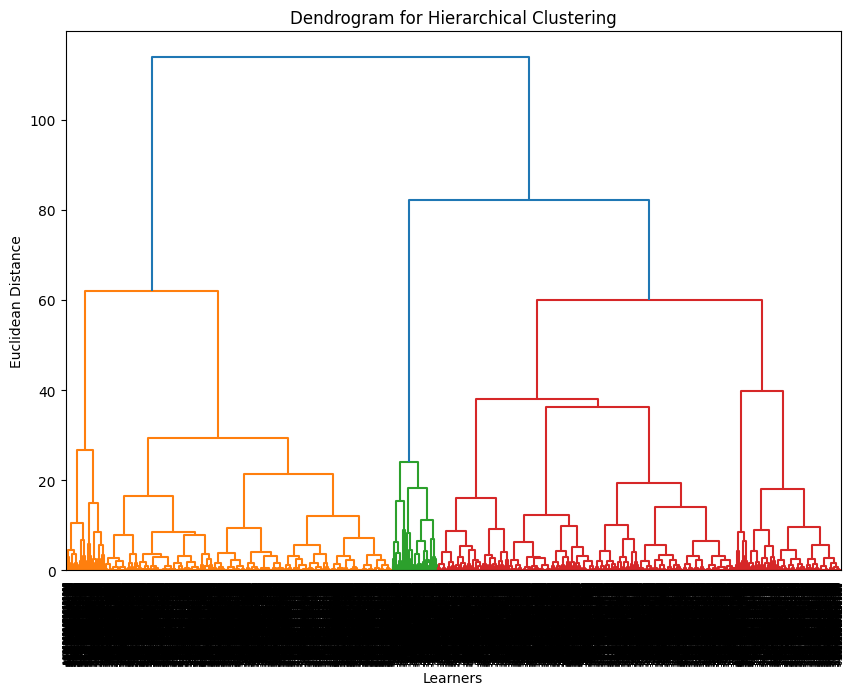

In [ ]:
# Randomly sample 10,000 rows from the dataframe
df_sample = df.sample(n=10000, random_state=42)

# Perform hierarchical clustering
Z = linkage(df_sample[['ctc', 'Yoe']], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_sample['job_position_encoded'].values, orientation='top', distance_sort='ascending')
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Learners')
plt.ylabel('Euclidean Distance')
plt.show()

**Due to PC RAM limitation unable to perform the "Hierarchical Clustering" on entire dataset.So unable to comment on above questions**